In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'givenby_gemini.ipynb',
 'givenby_grok.ipynb',
 'Heart_attack-Copy1.ipynb',
 'Heart_attack.ipynb',
 'Heart_attack_.ipynb']

In [3]:
os.chdir(r"E:\Project\Material\Training_Set\Training_Set")

In [4]:
os.listdir()


['RFMiD_Training_Labels.csv', 'Training']

In [5]:
df = pd.read_csv("RFMiD_Training_Labels.csv")
df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df["ID"] = df["ID"].astype(str) + ".png"

In [7]:
image_files = os.listdir("Training/")
image_folder="Training/"

In [8]:
# Function to show images with labels
def show_sample_images(num=5):
    image_files = os.listdir("Training/")[:num]
    image_folder="Training/"
    plt.figure(figsize=(12, 6))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(image_folder ,img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        
        # Extract label (ensure filenames match)
        label = "Unknown"
        matched_label = df[df["ID"] == img_file]
        if not matched_label.empty:
            label = matched_label.iloc[0,0]  # Use .iloc[0] to avoid errors

        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Label: {label}")
    
    plt.show()


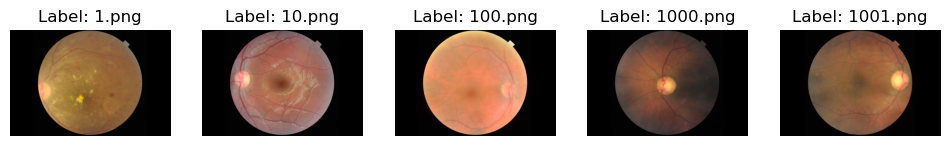

In [9]:
# Show sample images
show_sample_images(5)

In [10]:
# Function to load & resize images
def load_and_resize_images(image_folder, df, img_size=(224, 224)):
    images = []
    labels = []

    # Get list of label columns (excluding 'ID')
    label_columns = df.columns[1:]  # All columns except 'ID'

    for img_name in tqdm(df["ID"]):
        img_path = os.path.join(image_folder, img_name)
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize to 224x224
            img = img / 255.0  # Normalize pixels (0-1)
            
            images.append(img)
            # labels.append(df[df["ID"] == img_name].iloc[0, 1])  # Extract label
            
            # Extract multi-labels as a NumPy array
            label_values = df[df["ID"] == img_name][label_columns].values[0]
            labels.append(label_values)

    return np.array(images), np.array(labels)

In [11]:
# Load dataset
X_train, y_train = load_and_resize_images(image_folder, df)

print("Dataset Loaded!")
print("Shape of X (Images):", X_train.shape)
print("Shape of y (Labels):", y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 1920/1920 [05:46<00:00,  5.55it/s]


Dataset Loaded!
Shape of X (Images): (1919, 224, 224, 3)
Shape of y (Labels): (1919, 46)


In [15]:
test_image_folder = r"E:\Project\Material\Test_Set\Test_Set\Test"
# Load labels
test_df = pd.read_csv(r"E:\Project\Material\Test_Set\Test_Set\RFMiD_Testing_Labels.csv")
test_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_df["ID"] = test_df["ID"].astype(str) + ".png"

In [17]:
# Load test dataset
X_test, y_test = load_and_resize_images(test_image_folder, test_df)

print("Test Dataset Loaded!")
print("Shape of X_test (Images):", X_test.shape)
print("Shape of y_test (Labels):", y_test.shape)


100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [02:03<00:00,  5.19it/s]


Test Dataset Loaded!
Shape of X_test (Images): (640, 224, 224, 3)
Shape of y_test (Labels): (640, 46)


In [18]:
y_test

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0-1)
    rotation_range=20,       # Random rotation (max 20 degrees)
    width_shift_range=0.2,   # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill missing pixels with nearest values
)

# Validation/Test Set (Only Rescaling, No Augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Images
train_generator = train_datagen.flow_from_directory(
    r'E:\Project\Material\Training_Set\Training_Set\Training', 
    # Update with correct path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Validation Images
val_generator = val_datagen.flow_from_directory(
    r'E:\\Project\\Material\\Test_Set\\Test_Set\\Test',  # Update with correct path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("✅ Data augmentation applied successfully!")


# # Data Augmentation (Only for Training)
# # train_datagen = ImageDataGenerator(
# #     rotation_range=10,
# #     horizontal_flip=True,
# #     vertical_flip=True,
# #     zoom_range=0.1,
# #     brightness_range=[0.8, 1.2]
# # )


# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,  # Increased from 30
#     width_shift_range=0.3,  # Increased from 0.2
#     height_shift_range=0.3,  # Increased from 0.2
#     shear_range=0.2,
#     zoom_range=0.3,  # Increased zoom range
#     horizontal_flip=True,
#     fill_mode='nearest'
# )




# # No augmentation for testing
test_datagen = ImageDataGenerator()

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
✅ Data augmentation applied successfully!


In [17]:
from sklearn.utils import shuffle

# Shuffle training dataset
df = shuffle(df, random_state=42).reset_index(drop=True)


In [26]:
# Generate augmented training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [20]:
# import tensorflow as tf
# tf.config.run_functions_eagerly(True)  # Enable eager execution

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the number of classes based on your dataset
num_classes = 46  # Adjust this based on your dataset

# Load ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional: you can fine-tune later)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Regularized Dense layer
x = Dropout(0.5)(x)  # Dropout to reduce overfitting
predictions = Dense(num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,855,918 (91.00 MB)

 Trainable params: 268,206 (1.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Define CNN Model
# model = Sequential([
#     # Convolutional Layers
#     Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),

#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(256, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(512, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),

#     # Flatten before Dense Layers
#     Flatten(),

#     # Fully Connected Layers
#     Dense(128, activation='relu'),
#     Dropout(0.5),  # Regularization
#     Dense(64, activation='relu'),
#     Dense(len(label_columns), activation='sigmoid')  # Multi-label classification
# ])

# # Compile Model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # Since it's multi-label classification
#               metrics=['accuracy'])

# # Model Summary
# model.summary()


In [24]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Flatten the labels into a single array
# labels = np.array(y_train).flatten()

# # Compute class weights for balancing
# class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)

# # Convert to dictionary format required for model.fit()
# class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [28]:
# Train Model
# history = model.fit(train_generator, 
#                     epochs=5, 
#                     validation_data=test_generator)

# Train the model with class weights
# model.fit(train_generator, epochs=10,validation_data=test_generator, batch_size=32, class_weight=class_weight_dict, verbose=1)
model.fit(train_generator, validation_data=test_generator, epochs=10)

# Save Model
model.save(r"E:/Project/Dataset/Code/retinal_cnn_model2.h5")


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.3082 - loss: 9.5325 - val_accuracy: 1.0000 - val_loss: 6.9635
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.9700 - loss: 7.5061 - val_accuracy: 1.0000 - val_loss: 6.4531
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.8999 - loss: 7.0510 - val_accuracy: 1.0000 - val_loss: 6.4873
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8757 - loss: 7.4958 - val_accuracy: 1.0000 - val_loss: 6.7614
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8164 - loss: 7.6745 - val_accuracy: 1.0000 - val_loss: 7.2394
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7950 - loss: 8.3853 - val_accuracy: 1.0000 - val_loss: 8.0617
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7738 - loss: 9.0503 - val_accuracy: 1.0000 - val_loss: 9.1276
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7309 - loss: 10.5492 - val_accuracy: 1.0000 - 

In [30]:
model.save('my_model.keras')

In [32]:
# Evaluate on Test Set
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Evaluate model on the validation set
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")



20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 1.0000 - loss: 14.2511
Validation Accuracy: 100.00%
Validation Loss: 13.5910


In [27]:
# from tensorflow.keras.models import load_model

# # Load the saved CNN model
# # model = load_model("E:/Project/Dataset/Code/retinal_cnn_model2.h5")
# # print("Model Loaded Successfully!")

# # Save the trained model
# model.save("E:/Project/Dataset/Code/heart_attack_model.h5")
# print("✅ Model saved successfully!")



Model Loaded Successfully!


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define labels (Make sure they match the dataset columns)
label_columns = ["Disease_Risk", "DR", "ARMD", "MH", "DN", "MYA", "BRVO", "TSLN", "ERM", "LS"]

# Function to preprocess and predict image
def predict_image(image_path):
    img = cv2.imread(image_path)  # Load Image
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Reshape for model

    # Predict using CNN model
    predictions = model.predict(img)[0]

    # Create dictionary with predicted labels
    results = {label_columns[i]: round(predictions[i], 2) for i in range(len(label_columns))}
    
    # Display image & prediction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted Risk: {results['Disease_Risk']}")
    plt.show()
    
    return results


In [34]:
from tkinter import filedialog

In [35]:
os.chdir(r"E:\Project\Material\Evaluation_Set\Evaluation_Set")

In [36]:
a=os.listdir()
a

['RFMiD_Validation_Labels.csv', 'Validation']

In [37]:
# image_path=filedialog.askopenfilename(title="Select image")
image_path=r"E:/imgg.jpg"
image_path

'E:/imgg.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


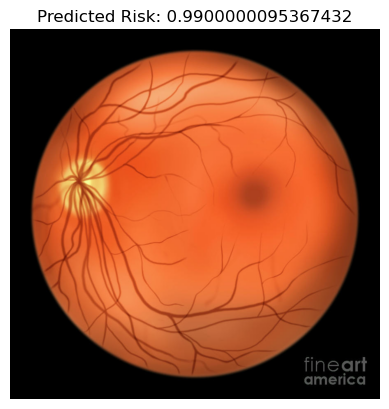

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}


In [38]:
if image_path:
    predic=predict_image(image_path)
    print("probability is : ",predic)

E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\12.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


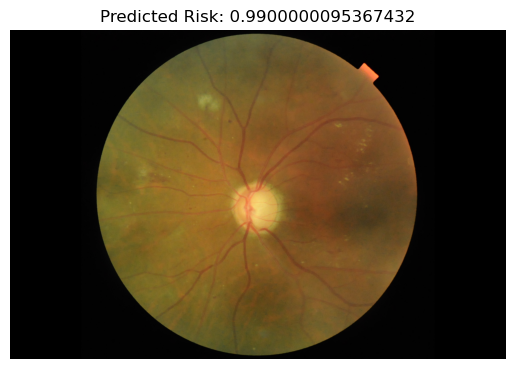

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\13.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


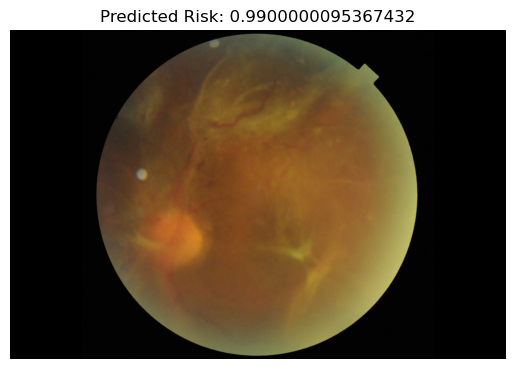

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\14.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


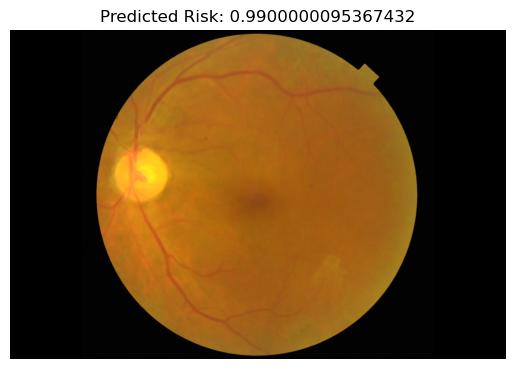

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\15.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


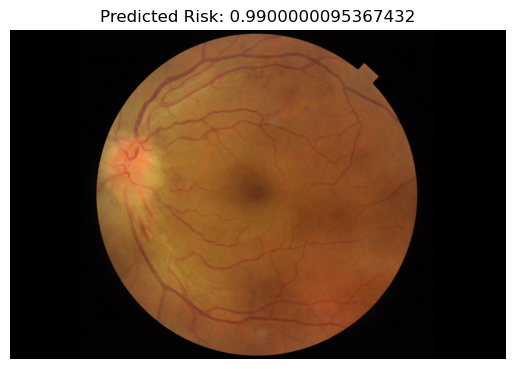

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\16.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


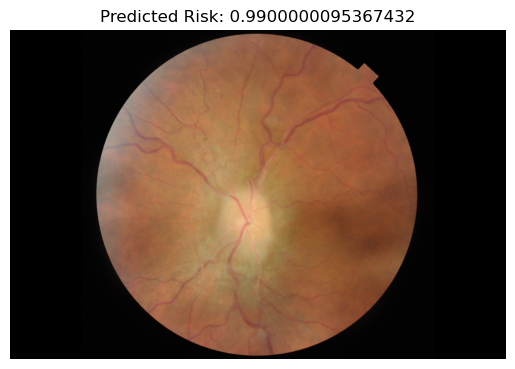

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\17.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


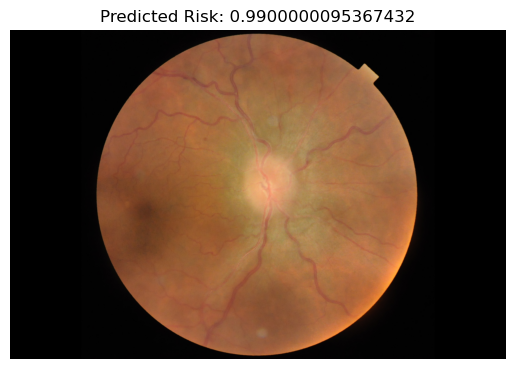

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\18.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


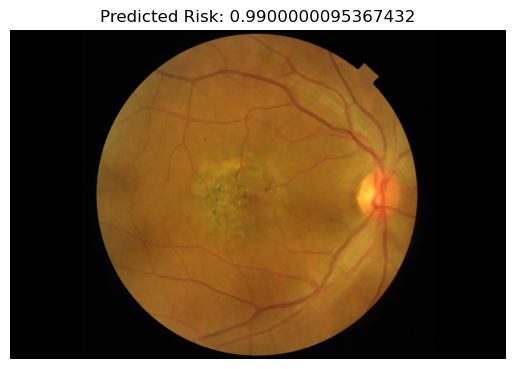

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\19.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


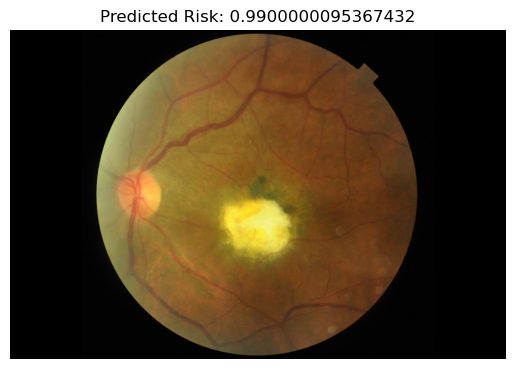

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}
E:\Project\Material\Evaluation_Set\Evaluation_Set\Validation\20.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


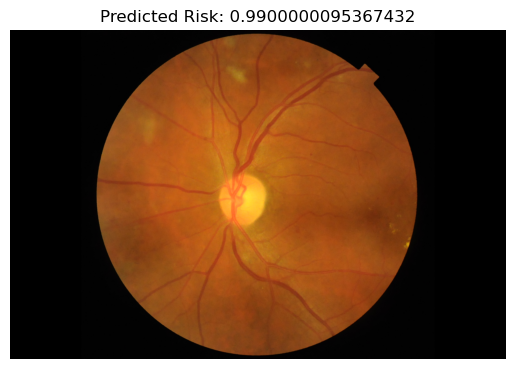

probability is :  {'Disease_Risk': 0.99, 'DR': 0.01, 'ARMD': 0.0, 'MH': 0.0, 'DN': 0.0, 'MYA': 0.0, 'BRVO': 0.0, 'TSLN': 0.0, 'ERM': 0.0, 'LS': 0.0}


In [39]:
# image_path=filedialog.askopenfilename(title="Select image")
for i in range(11,20):
    image_path=(f"E:\\Project\\Material\\Evaluation_Set\\Evaluation_Set\\Validation\\{i+1}.png")
    print(image_path)
    if image_path:
        predic=predict_image(image_path)
        print("probability is : ",predic)